<a href="https://colab.research.google.com/github/andresizer/alura-data/blob/main/Imers%C3%A3o_Dados_4_Analisando_im%C3%B3veis_de_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando pandas e conhecendo a base de dados

In [188]:
import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados.dtypes

Rua          object
Bairro       object
Cidade       object
Metragem      int64
Quartos       int64
Banheiros     int64
Vagas         int64
Valor        object
dtype: object

In [33]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


**Meu deus, será que o imóvel que tem 750 mil metros quadrados é o mesmo que tem 16 quartos, 40 banheiros e 50 vagas?**

In [35]:
dados.query('Metragem == 750000')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


In [36]:
dados.query('Quartos == 16')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,R$ 790.000
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,R$ 790.000


In [37]:
dados.query('Banheiros == 40')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000


In [38]:
dados.query('Vagas == 50')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000



**Aparentemente todos esses resultados estão estranhos, passíveis de uma investigação mais profunda!**

---

**Vamos começar identificando os dados faltantes!**

#Investigando dados faltantes

In [39]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Vemos que as colunas Rua e Bairro possuem dados faltantes. Vamos começar investigando a coluna Bairro, a qual possui menos dados faltantes

In [81]:
dados[dados['Bairro'].isna()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000


**Huuuum, muito estranho...**

Será que todos os imóveis cujo número é 3773 possuem dados faltantes? Será que isso está causando algum erro?



Primeiro vamos eliminar os dados faltantes das ruas para procurar todas as ruas que contém o número 3773 

In [83]:
dadosruacerta = dados[~dados['Rua'].isna()]
dadosruacerta

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [84]:
contem = dadosruacerta['Rua'].str.contains('3773')

dadosruacerta.query('@contem')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
9310,"Rua Professor Lúcio Martins Rodrigues, 3773",NaN,São Paulo,358,4,6,7,R$ 1.600.000


**Realmente não há nenhum registro de rua com o número 3773 que contenha o bairro ❗**

Podemos notar também que alguns registros do campo Valor estão contendo 

#Pausa no devaneio e vamos aos desafios da aula 01: Encontrando a média de metragem para cada um dos bairros

**Encontrando a média da metragem de cada bairro**

In [100]:
metragem_por_bairro = dados.groupby(['Bairro'])['Metragem'].mean().to_frame()
metragem_por_bairro

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


In [138]:
metragem_por_bairro.describe()

,Metragem
count,701.000000
mean,285.448322
std,1403.268009
min,10.000000
25%,135.444444
50%,184.454545
75%,265.500000
max,37000.000000


**Um gráfico de barras com 30 amostras aleatórias dos bairros encontrados, cada vez que rodar essa célula o gráfico muda**

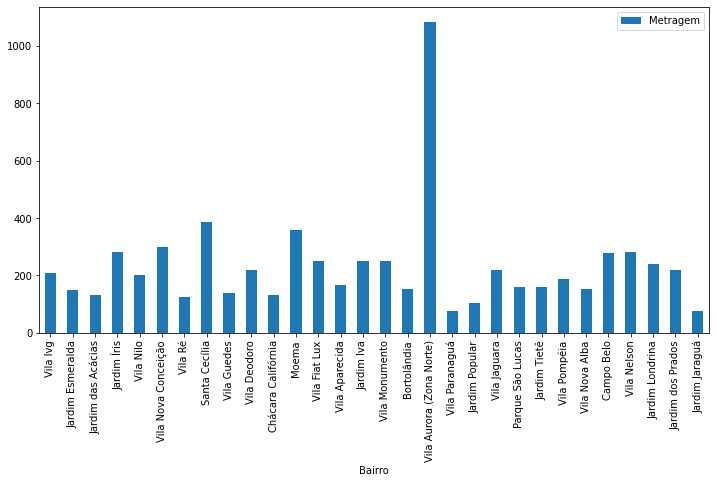

In [155]:
metragem_por_bairro.sample(30).plot.bar(figsize=(12,6))

**Para tentar identificar os valores das pontas criei essas duas variáveis e plotei os gráficos a seguir**

In [128]:
menores_metragens = metragem_por_bairro.sort_values(by = 'Metragem')

In [129]:
maiores_metragens = metragem_por_bairro.sort_values(by = 'Metragem', ascending = False)

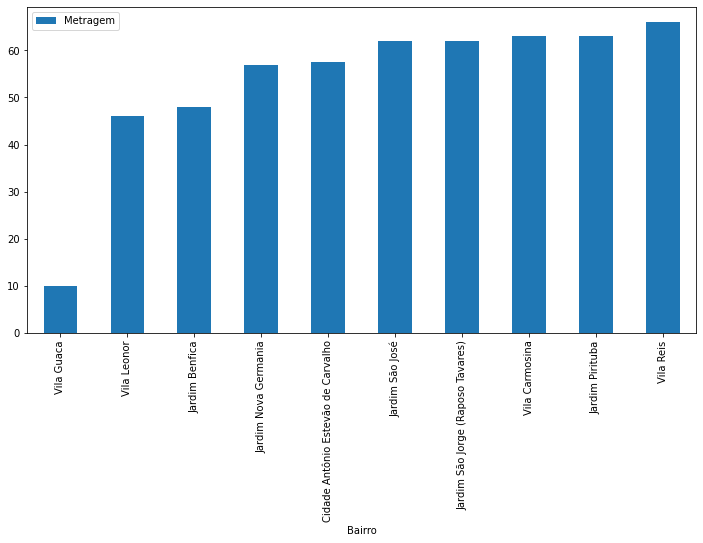

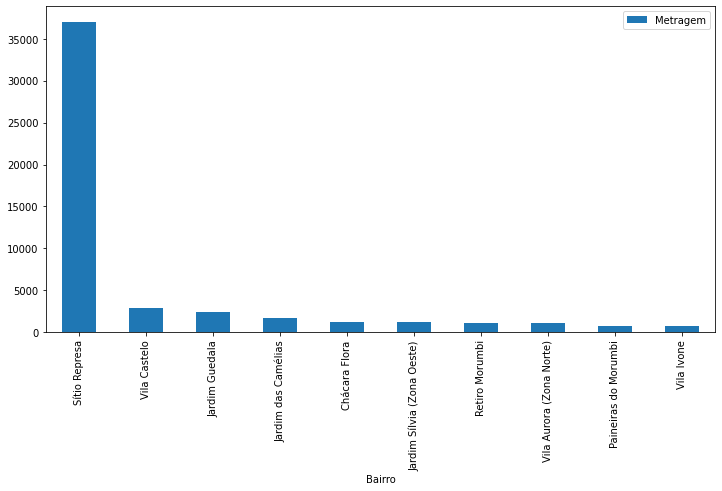

In [154]:
menores_metragens.head(10).plot.bar(figsize=(12,6))

maiores_metragens.head(10).plot.bar(figsize=(12,6))

In [132]:
dados.query('Bairro == "Sítio Represa"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


Notei uma grande diferença no bairro Sítio Represa e procurei os valores desse bairro. Nota-se que há apenas um registro, podendo ser um sítio mesmo com 3,7ha. Para saber se esse dado está correto são necessárias mais investigações

Algo que me chamou atenção foi o fato que lá no início encontrei um valor de metragem de 750000 em um registro e esse bairro não é o que possui a maior metragem média. Olhando os dados estatísticos, chego a conclusão que o valor desse registro deve ser 750m² ao invés de 750000m² 

In [148]:
dados.query('Bairro == "Jardim Guedala"')['Metragem'].describe().to_frame()

,Metragem
count,403.000000
mean,2486.640199
std,37329.488020
min,250.000000
25%,479.000000
50%,580.000000
75%,750.000000
max,750000.000000


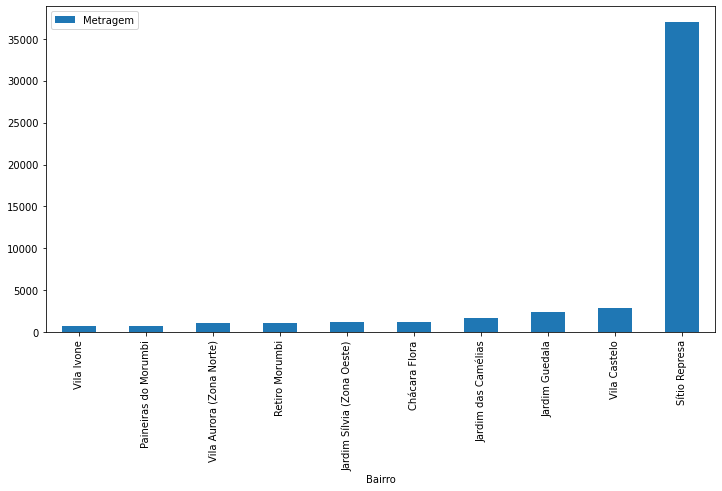

In [164]:
metragem_por_bairro.sort_values(by='Metragem').tail(10).plot.bar(figsize=(12,6))

#02 formas de selecionar os dados por bairro

In [191]:
dados.query('Bairro == "Jardim Paulista"').sample(30)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6859,NaN,Jardim Paulista,São Paulo,425,4,4,2,R$ 3.800.000
2145,NaN,Jardim Paulista,São Paulo,395,5,6,6,R$ 5.500.000
2665,NaN,Jardim Paulista,São Paulo,180,3,2,1,R$ 3.000.000
1517,Rua Honduras,Jardim Paulista,São Paulo,185,3,5,4,R$ 4.350.000
3617,Rua Maestro Chiaffarelli,Jardim Paulista,São Paulo,196,3,2,1,R$ 2.600.000
7247,Alameda Joaquim Eugênio de Lima,Jardim Paulista,São Paulo,400,5,5,4,R$ 6.000.000
3198,NaN,Jardim Paulista,São Paulo,900,4,9,10,R$ 8.000.000
8100,Rua Primavera,Jardim Paulista,São Paulo,355,3,3,4,R$ 25.000\n /Mês
8848,Rua Maestro Chiaffarelli,Jardim Paulista,São Paulo,231,3,3,2,R$ 3.200.000
6688,NaN,Jardim Paulista,São Paulo,525,4,6,6,R$ 7.500.000


In [193]:
dados[dados['Bairro'] == 'Planalto Paulista']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
116,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,R$ 2.014.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


#Explorar alguns gráficos e aplicar ao DF, tentar encontrar alguma conclusão

In [209]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


**Um dado estranho, procurando apartamentos com 01 quarto e 01 banheiro achamos alguns muito grandes, deve haver algum erro nos dados. Mas mesmo eliminando eles, os imóveis ainda assim são muito grandes para ter 01 quarto e 01 banheiro apenas**

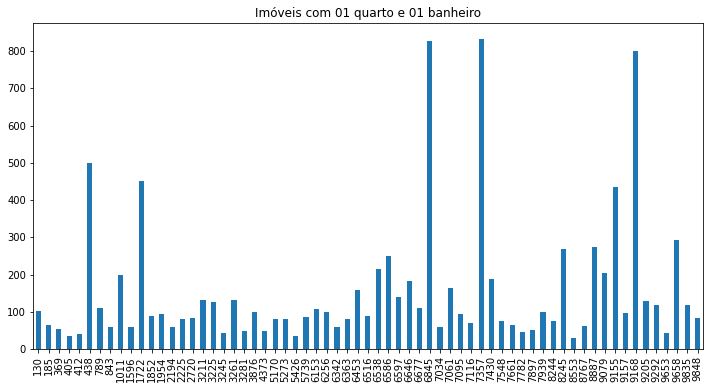

In [224]:
graf1 = dados.query('Quartos == 1 & Banheiros == 1')['Metragem'].plot.bar(figsize = (12,6), title = 'Imóveis com 01 quarto e 01 banheiro')
graf1 = graf1

Existem 30 registros de imóveis com 1 quarto, 1 banheiro e mais de 100 m²


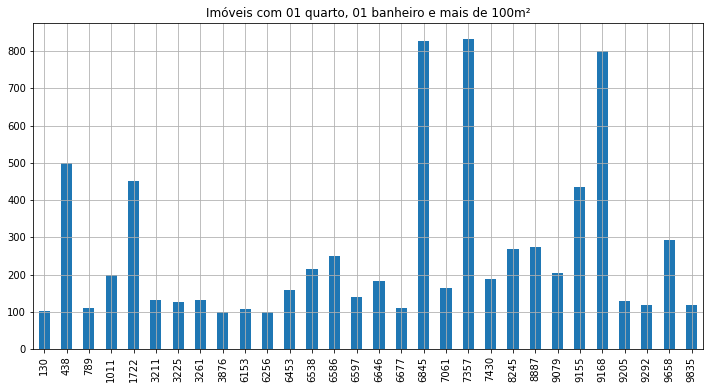

In [238]:
busca_dados = dados.query('Quartos == 1 & Banheiros == 1 & Metragem >= 100')['Metragem'].count()
print(f'Existem {busca_dados} registros de imóveis com 1 quarto, 1 banheiro e mais de 100 m²')
graf2 = dados.query('Quartos == 1 & Banheiros == 1 & Metragem >= 100')['Metragem'].plot.bar(grid = True, figsize = (12,6), title = 'Imóveis com 01 quarto, 01 banheiro e mais de 100m²')
graf2 = graf2

Existem 45 registros de imóveis no bairro Mooca
A média de vagas nos imóveis do bairro Mooca é de 2.911111111111111
O imóvel com menos vagas no bairro Mooca possui 1 vagas
O imóvel com mais vagas no bairro Mooca possui 12 vagas


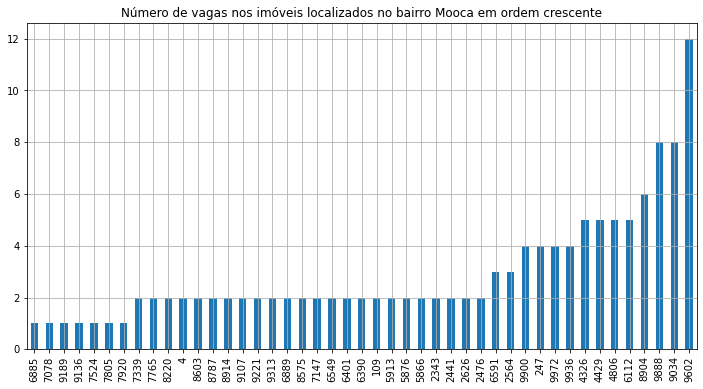

In [305]:
busca_dados1 = dados[dados['Bairro'] == 'Mooca']['Vagas'].count()
graf3 = dados[dados['Bairro'] == 'Mooca']['Vagas'].sort_values().plot.bar(grid = True, figsize = (12,6), title = 'Número de vagas nos imóveis localizados no bairro Mooca em ordem crescente')
media_vagas_mooca = dados[dados['Bairro'] == 'Mooca']['Vagas'].mean()
min_vagas_mooca = dados[dados['Bairro'] == 'Mooca']['Vagas'].min()
max_vagas_mooca = dados[dados['Bairro'] == 'Mooca']['Vagas'].max()
print(f'Existem {busca_dados1} registros de imóveis no bairro Mooca')
print(f'A média de vagas nos imóveis do bairro Mooca é de {media_vagas_mooca}')
print(f'O imóvel com menos vagas no bairro Mooca possui {min_vagas_mooca} vagas')
print(f'O imóvel com mais vagas no bairro Mooca possui {max_vagas_mooca} vagas')
graf3 = graf3

In [277]:
media_vagas_bairro = dados.groupby('Bairro')['Vagas'].mean().sort_values()
media_vagas_bairro.to_frame()

,Vagas
Bairro,
Jardim Independência,1.000000
Vila Cardoso Franco,1.000000
Vila Carmosina,1.000000
Jardim Modelo,1.000000
Jardim Marília,1.000000
...,...
Vila Aurora (Zona Norte),10.000000
Retiro Morumbi,10.386364
Parque Novo Mundo,12.000000


*Percebe-se a diferença entre o describe da média das vagas por bairro e das vagas de todos os itens, fato que pode ser explicado por a média por bairro eliminar alguns dados errados, visto que são perdidos no meio da multidão. Este fato pode ser notado pela grande diferença do desvio padrão!**

In [309]:
print('Descritivo da média de vagas por bairro')
media_vagas_bairro.describe()


Descritivo da média de vagas por bairro


count    701.000000
mean       3.186328
std        1.690567
min        1.000000
25%        2.000000
50%        2.857143
75%        4.000000
max       16.000000
Name: Vagas, dtype: float64

In [307]:
print('Descritivo das vagas dos imóveis')
dados['Vagas'].describe()


Descritivo das vagas dos imóveis


count    10008.000000
mean         4.097222
std          2.824014
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         50.000000
Name: Vagas, dtype: float64

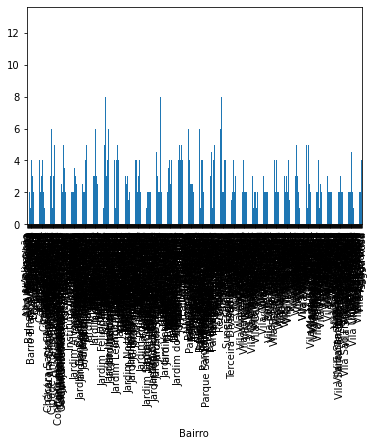

In [312]:
dados.groupby('Bairro')['Vagas'].median().plot.bar()


#Descobrir bairros que não possuem nome de rua

In [340]:
bairros_rua_null = dados[dados['Rua'].isna()]['Bairro'].drop_duplicates()
bairros_rua_null.to_frame()

,Bairro
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9672,Jardim Vila Formosa
9774,Cupecê
9780,Jardim Itacolomi
9816,Água Rasa
